Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [18]:
NAME = "Aleksandrov Vladislav BPM182"
COLLABORATORS = "-"

---

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Часть I. Метод Ньютона нахождения корней уравнения.

Напишите алгоритм, который выполняет итерации Ньютона для заданной функции $f(x)$ с известной производной $f'(x)$. Ваша функция должна находить корни $f(x)$ с заданной точностью $\epsilon$.

In [20]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    f : callable
        Функция, корни которой мы хотим найти.
    fder : callable
        Производная `f`.
    x0 : float
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для предотвращения бесконечного зацикливания.
    
    Returns
    -------
    x : float
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    x = x0
    iter = 0

    while True:
      x_next = x - (f(x)/fder(x))
      iter += 1
      if (abs(x_next - x) < eps) or (iter == maxiter):
        break
      x = x_next
    return x, iter

In [21]:
from numpy.testing import assert_allclose

xx, nit = newton_iteration(lambda x: x**2 - 1, lambda x: 2.*x, x0=4)
assert_allclose(xx, 1.0, atol=1e-5)
assert nit < 10

xx, nit = newton_iteration(lambda x: x**2 - 1, lambda x: 2.*x, x0=-4)
assert_allclose(xx, -1.0, atol=1e-5)
assert nit < 10


from math import log, exp

xx, nit = newton_iteration(lambda x: exp(x)-2, lambda x: exp(x), x0=4, eps=1e-10)
assert_allclose(xx, log(2), atol=1e-10)

Используя функцию `newton_iteration` для функции $f(x) = x^2 - 1$, постройте зависимость логарифма ошибки нахождения корня методом Ньютона от числа итераций. Какова сходимость метода (линейная, квадратичная, иная)?

### Your code here.

[2.1972245773362196, 2.079452891597866, 1.945958376043449, 1.791927504417547, 1.6100037966541074, 1.3882359038968892, 1.105635983846536, 0.7212535155733463, 0.14068871231808336, -0.9576693446526453]


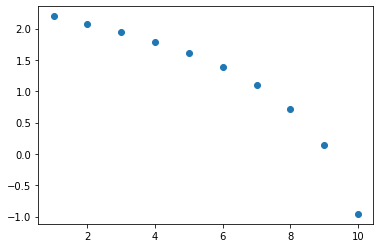

Cходимость выглядит как квадратичная


In [22]:
import math
x_ax = range(1,11)
y_ax = []
for i in range(1,11):
  x1, nit1 = newton_iteration(lambda x: exp(x)-2, lambda x: exp(x), x0=10, eps=1e-16, maxiter=i)
  y_ax.append(math.log(abs(x1 - 1.0)))
print(y_ax)
plt.plot(x_ax,y_ax, "o")
plt.show()
print("Cходимость выглядит как квадратичная")

# Часть II. Модифицированный метод Ньютона для кратных корней.

Рассмотрим функцию, имеющую кратный корень (например, $f(x) = (x^2 - 1)^2$). Реализуйте модифицированную итерацию Ньютона, 

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

In [23]:
def mod_newton(f, fder, x0, m, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    f : callable
        Функция, корни которой мы хотим найти.
    fder : callable
        Производная `f`.
    x0 : float
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для преcдотвращения бесконечного зацикливания.
    
    Returns
    -------
    x : float
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    x = x0
    iter = 0

    while True:
      x_next = x - m*(f(x)/fder(x))
      iter += 1
      if (abs(x_next - x) < eps) or (iter == maxiter):
        break
      x = x_next
    return x, iter

In [24]:
for m in [1, 2, 3, 4, 5, 6]:
    xx, nit = mod_newton(lambda x: (x**2 - 1)**4,
                         lambda x: 4*(x**2 - 1)**3 * 2 * x,
                         x0=2, m=m, maxiter=10000, eps=1e-9)
    assert_allclose(xx, 1.0, atol=1e-8)
    

Используйте модифицированную итерацию Ньютона для функции $f(x) = (x^2 - 1)^2$ со значениями  $m= 1, 2, 3, 4, 5, 6$. Сколько итераций требуется для достижения сходимости с фиксированным значением $\epsilon$? Согласуются ли ваши наблюдения с предсказанием о квадратичной сходимости метода при значении $m$ равном кратности корня, и линейной сходимости для остальных значений $m$?

### Your code here.


m = 1


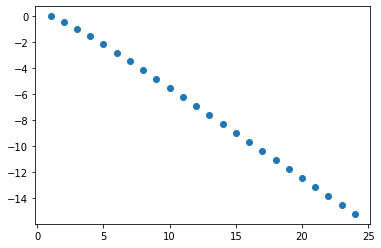


m = 2


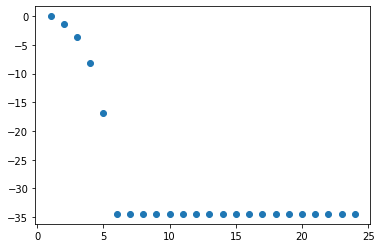


m = 3


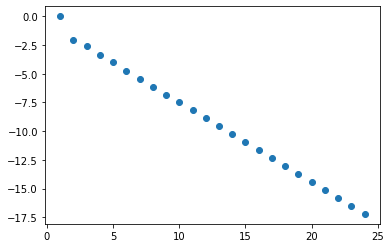


m = 4


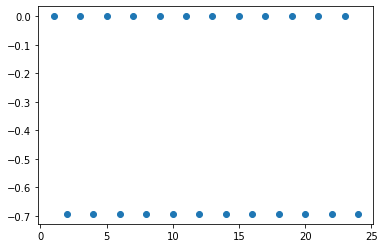


m = 5


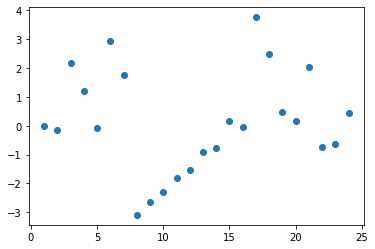


m = 6


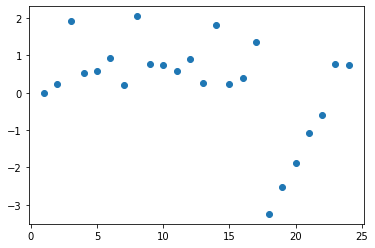


Как видно, при m = 1, 3 скорость линейная, при m = 2 - квадратичная, при m = 4, 5, 6 - метод не сходится.


In [25]:
for m in range(1,7):
  print("\nm =", m)
  x_ax = range(1,25)
  y_ax = []
  for i in range(1,25):
    x1, nit1 = xx, nit = mod_newton(lambda x: (x**2 - 1)**2,
                         lambda x: 2*(x**2 - 1) * 2 * x,
                         x0=2, m=m, maxiter=i, eps=1e-9)
    y_ax.append(math.log(abs(x1 - 1.0)))
  plt.plot(x_ax,y_ax, "o")
  plt.show()
print("\nКак видно, при m = 1, 3 скорость линейная, при m = 2 - квадратичная, при m = 4, 5, 6 - метод не сходится.")

# Часть III. Метод Ньютона для системы нелинейных уравнений.

Напишите алгоритм, который выполняет итерации Ньютона для заданной системы нелинейных уравнений $\vec{f}(x) = 0$ с известной матрицей Якоби $J(x)$. Ваша функция должна находить корни вектор-функции $\vec{f}(x)$ с заданной точностью $\epsilon$.

In [26]:
def newton_system(F, jcb, X0, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    F : callable
        Вектор-функция системы, которую мы хотим решить.
    jcb : callable
        Производная `f`.
    X0 : array-like of floats, shape (n,)
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для предотвращения бесконечного зацикливания.
    
    Returns
    -------
    X : array-like of floats, shape (n,)
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    x_prev = X0
    iter = 0

    while True:
      D_vec = jcb(x_prev)
      x = np.linalg.solve(D_vec, D_vec @ x_prev - F(x_prev))
      iter += 1
      if (np.linalg.norm(x - x_prev) < eps) or iter == maxiter:
        break
      x_prev = x
    
    return x, iter


In [27]:
from numpy.testing import assert_allclose

def func(X):
    return np.array([X[0]**2 - 2*X[1]**4 + 1, X[0] - X[1]**3 + 1])

def jac(X):
    return np.array([[2.*X[0], -8.*X[1]**3],
                       [1., -3.*X[1]**2]])

xx, nit = newton_system(func, jac, np.array([3., 2.]))
assert_allclose(xx, np.array([4.02879487, 1.71325223]), atol=1e-5)
assert nit < 10

xx, nit = newton_system(func, jac, np.asarray([1., 2.]))
assert_allclose(xx, np.asarray([-0.35119943,  0.86570596]), atol=1e-5)
assert nit < 10

